In [48]:
import polars as pl
import matplotlib.pyplot as plt

# Load job applicant csv file into dataframe
job_applicants_df = pl.read_csv("Job_Applicants_by_Gender_and_Ethnicity.csv")
assert job_applicants_df is not None
assert job_applicants_df.shape == (187, 14)
print(job_applicants_df.head)

pl.Config.set_tbl_cols(100)

<bound method DataFrame.head of shape: (187, 14)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬───────┬────────┬───────┬───────┬───────┬───────┬───────┐
│ Fis ┆ Job ┆ Job ┆ App ┆ Fem ┆ Mal ┆ Unk ┆ Black ┆ Hispan ┆ Asian ┆ Cauca ┆ Ameri ┆ Filip ┆ Unkno │
│ cal ┆ Num ┆ Des ┆ s   ┆ ale ┆ e   ┆ now ┆ ---   ┆ ic     ┆ ---   ┆ sian  ┆ can   ┆ ino   ┆ wn_Et │
│ Yea ┆ ber ┆ cri ┆ Rec ┆ --- ┆ --- ┆ n_G ┆ i64   ┆ ---    ┆ i64   ┆ ---   ┆ India ┆ ---   ┆ hnici │
│ r   ┆ --- ┆ pti ┆ eiv ┆ i64 ┆ i64 ┆ end ┆       ┆ i64    ┆       ┆ i64   ┆ n/    ┆ i64   ┆ ty    │
│ --- ┆ str ┆ on  ┆ ed  ┆     ┆     ┆ er  ┆       ┆        ┆       ┆       ┆ Alask ┆       ┆ ---   │
│ str ┆     ┆ --- ┆ --- ┆     ┆     ┆ --- ┆       ┆        ┆       ┆       ┆ an    ┆       ┆ i64   │
│     ┆     ┆ str ┆ i64 ┆     ┆     ┆ i64 ┆       ┆        ┆       ┆       ┆ Nativ ┆       ┆       │
│     ┆     ┆     ┆     ┆     ┆     ┆     ┆       ┆        ┆       ┆       ┆ …     ┆       ┆       │
│     ┆     ┆     ┆     ┆     ┆     ┆     

polars.config.Config

In [49]:
# Generate a summary of statistics
def stats_overview(df):
    summary_stats = df.select(
        [
            "Apps Received",
            "Black",
            "Hispanic",
            "Asian",
            "Caucasian",
            "American Indian/ Alaskan Native",
            "Filipino",
            "Unknown_Ethnicity",
        ]
    ).describe()
    return summary_stats


stats_overview(job_applicants_df)

statistic,Apps Received,Black,Hispanic,Asian,Caucasian,American Indian/ Alaskan Native,Filipino,Unknown_Ethnicity
str,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",187.0,187.0,187.0,187.0,187.0,187.0,187.0,187.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",499.721925,144.529412,182.165775,37.604278,84.470588,3.374332,19.631016,27.946524
"""std""",2252.044225,948.29058,824.193375,98.941786,320.911291,14.938187,61.753827,123.897752
"""min""",5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",38.0,5.0,10.0,3.0,9.0,0.0,1.0,2.0
"""50%""",100.0,14.0,24.0,9.0,26.0,1.0,5.0,6.0
"""75%""",263.0,42.0,97.0,29.0,64.0,2.0,13.0,20.0
"""max""",28230.0,12618.0,10214.0,1094.0,3843.0,153.0,740.0,1475.0


In [50]:
# Generate a table showing the total number of applicants by ethnicity
def total_and_eth_value(df):
    total_and_eth = df.select(
        [
            pl.sum("Apps Received").alias("Apps Received"),
            pl.sum("Black").alias("Black"),
            pl.sum("Hispanic").alias("Hispanic"),
            pl.sum("Asian").alias("Asian"),
            pl.sum("Caucasian").alias("Caucasian"),
            pl.sum("American Indian/ Alaskan Native").alias(
                "American Indian/ Alaskan Native"
            ),
            pl.sum("Filipino").alias("Filipino"),
            pl.sum("Unknown_Ethnicity").alias("Unknown_Ethnicity"),
        ]
    )

    # Add a row name for the total row
    total_and_eth = total_and_eth.with_columns(pl.lit("total").alias("statistic"))
    total_by_value = total_and_eth.select(
        ["statistic"] + [col for col in total_and_eth.columns if col != "statistic"]
    )
    return total_by_value


total_and_eth_value(job_applicants_df)

statistic,Apps Received,Black,Hispanic,Asian,Caucasian,American Indian/ Alaskan Native,Filipino,Unknown_Ethnicity
str,i64,i64,i64,i64,i64,i64,i64,i64
"""total""",93448,27027,34065,7032,15796,631,3671,5226


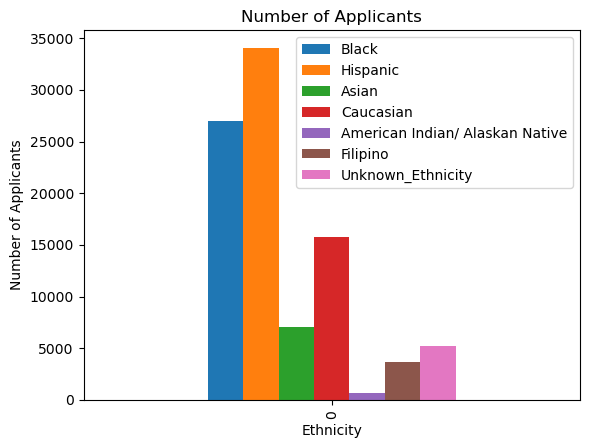

<function __main__.eth_chart(df)>

In [51]:
# calculate total number of applicants by ethinicity, for plotting
def ethnicity_total(df):
    eth_total = df[
        [
            "Black",
            "Hispanic",
            "Asian",
            "Caucasian",
            "American Indian/ Alaskan Native",
            "Filipino",
            "Unknown_Ethnicity",
        ]
    ].sum()
    return eth_total


# visualize the total number of applicants by ethnicity
def eth_chart(df):
    eth_and_total = ethnicity_total(df)
    eth_and_total = eth_and_total.to_pandas()
    eth_and_total.plot(kind="bar", stacked=False, title="Number of Applicants")
    plt.xlabel("Ethnicity")
    plt.ylabel("Number of Applicants")
    plt.show()
    return eth_chart


ethnicity_total(job_applicants_df)
eth_chart(job_applicants_df)